# Airport Data from CSV.

This notebooks reads sample population data from `data/Airports.csv` and clusters them based on distance 

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.datasets._samples_generator import make_blobs

In [9]:
df = pd.read_csv('../data/Airports.csv')
lats = np.array(df['LAT'])
longs = np.array(df['LONG'])
codes = np.array(df['CODE'])

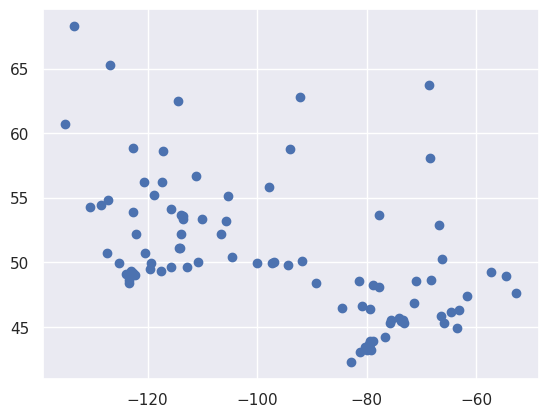

In [13]:
plt.scatter(longs, lats)

In [69]:
X = np.array([np.array([long, lat]) for  long, lat in zip(longs, lats)])

kmeans = KMeans(n_clusters=16)

kmeans.fit(X)

cluster_indices = kmeans.predict(X)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
codeDat = dict()
groupDat = defaultdict(list)
for long, lat, code, group in zip(longs, lats, codes, y_kmeans):
    codeDat[code] = {
        'long': long,
        'lat': lat,
        'group': int(group)
    }
    groupDat[str(group)].append({
        'long': long,
        'lat': lat,
        'code': code
    })
json_data = json.dumps(codeDat)
with open('codeDat.json', 'w') as f:
    f.write(json_data)
json_data = json.dumps(groupDat)
with open('groupDat.json', 'w') as f:
    f.write(json_data)

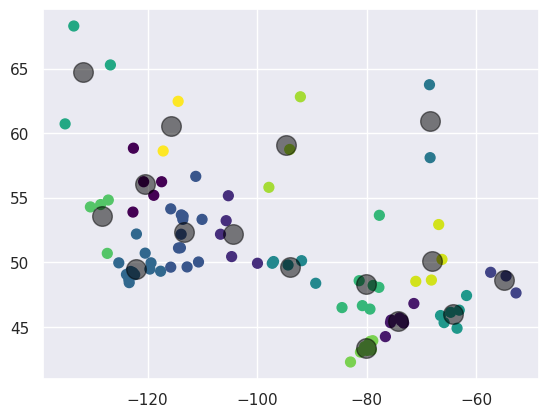

In [61]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)